# Classifyinng snd-cert
This notebook aims to get the best optimal value of n and r for the negative selection algorithm in the snd-cert dataset.

In [1]:
experiment_folder = "snd-cert"

In [2]:
import pandas as pd
from data_treatment import merge_datasets
from model import main
from validation import calculate_roc_auc_components
from viz import plot_best_aucs_per_n, plot_auc_optimization, plot_roc_auc_from_file

In [3]:
merge_datasets(
    [f"syscalls/{experiment_folder}/{experiment_folder}.1.test", f"syscalls/{experiment_folder}/{experiment_folder}.2.test", f"syscalls/{experiment_folder}/{experiment_folder}.3.test"],
    f"syscalls/{experiment_folder}/{experiment_folder}.test"
)

merge_datasets(
    [f"syscalls/{experiment_folder}/{experiment_folder}.1.labels", f"syscalls/{experiment_folder}/{experiment_folder}.2.labels", f"syscalls/{experiment_folder}/{experiment_folder}.3.labels"],
    f"syscalls/{experiment_folder}/{experiment_folder}.labels"
)

In [4]:
auc_metric = {}

for n in [7, 8, 9, 10, 11, 12]:
    auc_metric[n] = {}
    for r in [2, 3, 4, 5]:
        main(
            f"syscalls/{experiment_folder}/{experiment_folder}.train",
            f"syscalls/{experiment_folder}/{experiment_folder}.test",
            n,
            r,
            f"syscalls/{experiment_folder}/{experiment_folder}.labels",
            f"syscalls/{experiment_folder}/results.csv",
        )
        
        results = pd.read_csv(f"syscalls/{experiment_folder}/results.csv")

        auc_me, _, _ = calculate_roc_auc_components(results)
        auc_metric[n][r] = auc_me
        print(f"{n} {r} {auc_metric[n][r]}")
    
    plot_auc_optimization(
        n,
        [2, 3, 4, 5],
        [auc_metric[n][2], auc_metric[n][3], auc_metric[n][4], auc_metric[n][5]],
    )

Getting train dataset from file...
Getting new test dataset from file...
Applying model...


Getting anomally score for each word...


/home/ricardofurbino/ais/model.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label["anomaly_score"].iloc[i] = np.mean(final_result[i])


Saving anomally score to file...
Anomally score saved to file syscalls/snd-cert/results.csv
0.0
30.67107581323649
7 2 0.9784451612903227
Getting train dataset from file...
Getting new test dataset from file...
Applying model...
Getting anomally score for each word...


/home/ricardofurbino/ais/model.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label["anomaly_score"].iloc[i] = np.mean(final_result[i])


Saving anomally score to file...
Anomally score saved to file syscalls/snd-cert/results.csv
0.0
25.483428960139797
7 3 0.9793741935483872
Getting train dataset from file...
Getting new test dataset from file...
Applying model...


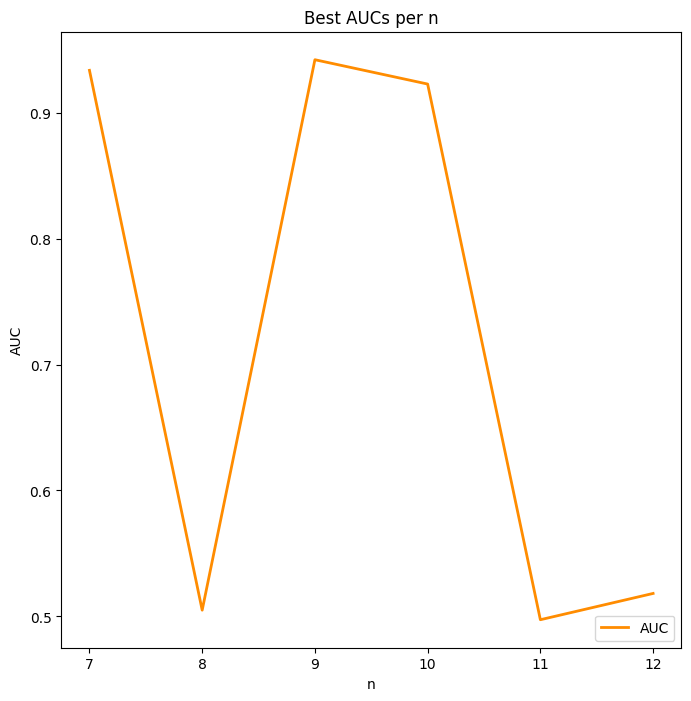

In [ ]:
best_r_values = []

best_n = 0
best_r_value = 0

for n in [7, 8, 9, 10, 11, 12]:
    # find the best r for each n
    best_r = max(auc_metric[n], key=auc_metric[n].get)
    best_r_values.append(auc_metric[n][best_r])

    if auc_metric[n][best_r] > best_r_value:
        best_n = n
        best_r_value = auc_metric[n][best_r]
    

plot_best_aucs_per_n(
    [7, 8, 9, 10, 11, 12],
    best_r_values,
)

Getting train dataset from file...
Getting new test dataset from file...
Applying model...


All strings containing non-alphabet symbols will be silently ignored.


Getting anomally score for each word...


/home/ricardofurbino/ais/model.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label["anomaly_score"].iloc[i] = np.mean(final_result[i])


Saving anomally score to file...
Anomally score saved to file syscalls/snd-cert/results.csv
11.861086905995396
11.861086905995396


/home/ricardofurbino/ais/validation.py:29: RuntimeWarning: invalid value encountered in divide
  sorted_score = (sorted_score - sorted_score.min()) / (sorted_score.max() - sorted_score.min())
/home/ricardofurbino/ais/validation.py:45: RuntimeWarning: invalid value encountered in scalar divide
  tpr = tp / (tp + fn)
/home/ricardofurbino/ais/validation.py:46: RuntimeWarning: invalid value encountered in scalar divide
  fpr = fp / (fp + tn)


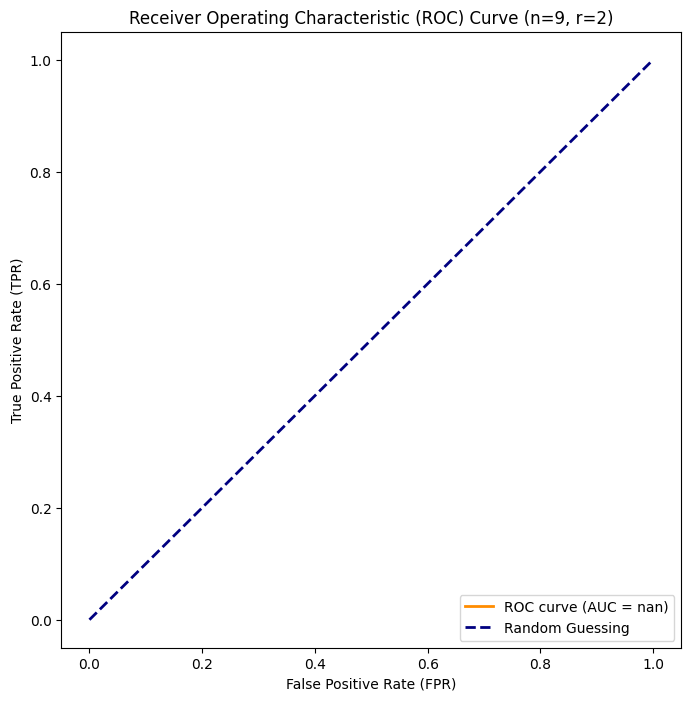

Getting train dataset from file...
Getting new test dataset from file...
Applying model...


All strings containing non-alphabet symbols will be silently ignored.


Getting anomally score for each word...


/home/ricardofurbino/ais/model.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label["anomaly_score"].iloc[i] = np.mean(final_result[i])


Saving anomally score to file...
Anomally score saved to file syscalls/snd-cert/results.csv
11.224001674198105
11.224001674198105


/home/ricardofurbino/ais/validation.py:29: RuntimeWarning: invalid value encountered in divide
  sorted_score = (sorted_score - sorted_score.min()) / (sorted_score.max() - sorted_score.min())
/home/ricardofurbino/ais/validation.py:45: RuntimeWarning: invalid value encountered in scalar divide
  tpr = tp / (tp + fn)
/home/ricardofurbino/ais/validation.py:46: RuntimeWarning: invalid value encountered in scalar divide
  fpr = fp / (fp + tn)


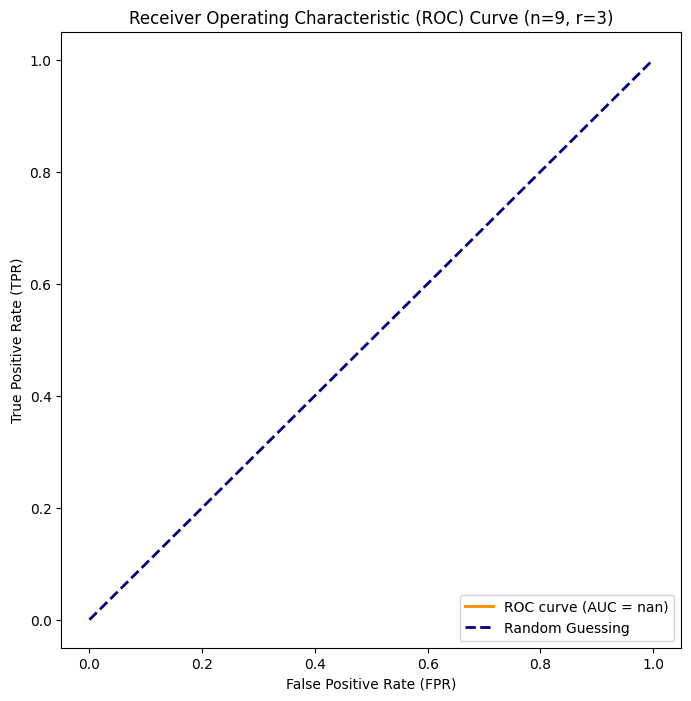

Getting train dataset from file...
Getting new test dataset from file...
Applying model...


All strings containing non-alphabet symbols will be silently ignored.


Getting anomally score for each word...


/home/ricardofurbino/ais/model.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label["anomaly_score"].iloc[i] = np.mean(final_result[i])


Saving anomally score to file...
Anomally score saved to file syscalls/snd-cert/results.csv
10.258566033889933
10.258566033889933


/home/ricardofurbino/ais/validation.py:29: RuntimeWarning: invalid value encountered in divide
  sorted_score = (sorted_score - sorted_score.min()) / (sorted_score.max() - sorted_score.min())
/home/ricardofurbino/ais/validation.py:45: RuntimeWarning: invalid value encountered in scalar divide
  tpr = tp / (tp + fn)
/home/ricardofurbino/ais/validation.py:46: RuntimeWarning: invalid value encountered in scalar divide
  fpr = fp / (fp + tn)


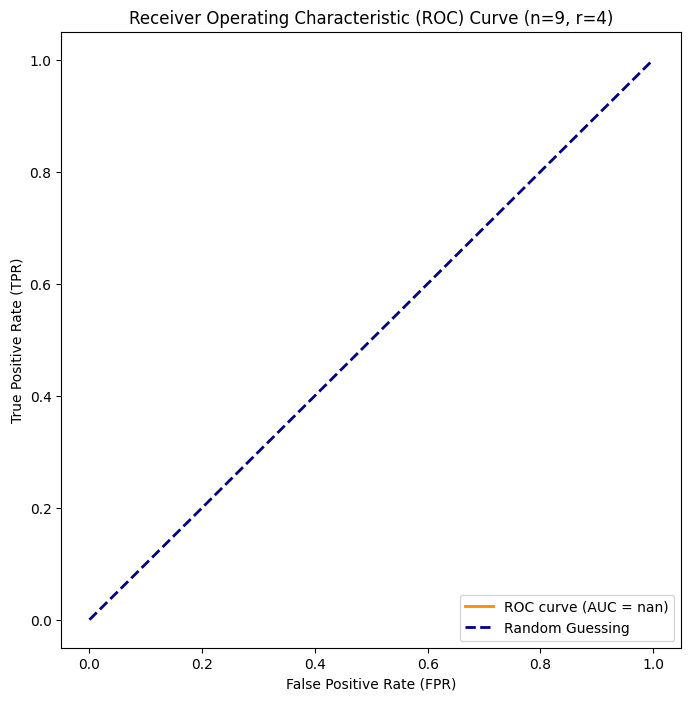

Getting train dataset from file...
Getting new test dataset from file...
Applying model...


All strings containing non-alphabet symbols will be silently ignored.


Getting anomally score for each word...


/home/ricardofurbino/ais/model.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label["anomaly_score"].iloc[i] = np.mean(final_result[i])


Saving anomally score to file...
Anomally score saved to file syscalls/snd-cert/results.csv
9.159871336778387
9.159871336778387


/home/ricardofurbino/ais/validation.py:29: RuntimeWarning: invalid value encountered in divide
  sorted_score = (sorted_score - sorted_score.min()) / (sorted_score.max() - sorted_score.min())
/home/ricardofurbino/ais/validation.py:45: RuntimeWarning: invalid value encountered in scalar divide
  tpr = tp / (tp + fn)
/home/ricardofurbino/ais/validation.py:46: RuntimeWarning: invalid value encountered in scalar divide
  fpr = fp / (fp + tn)


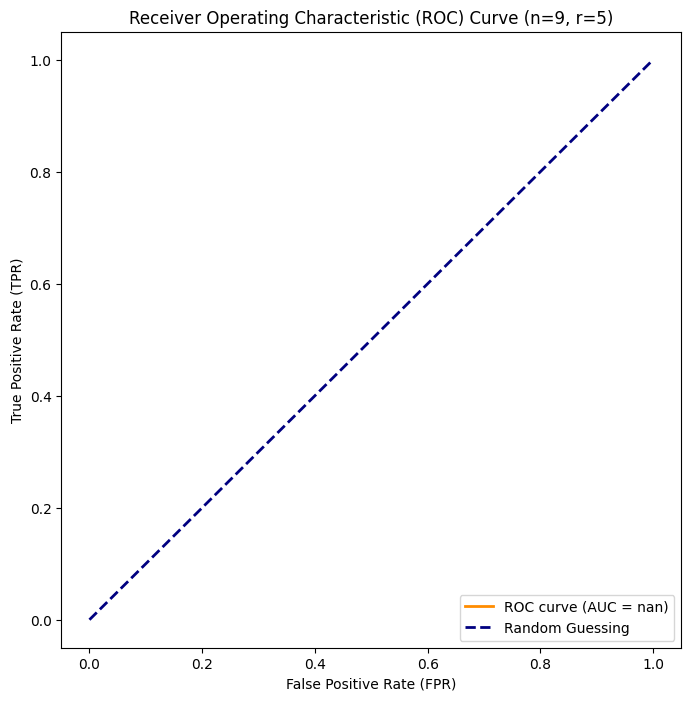

In [ ]:
for r in [2, 3, 4, 5]:
    main(
        f"syscalls/{experiment_folder}/{experiment_folder}.test",
        f"syscalls/{experiment_folder}/{experiment_folder}.labels",
        n,
        r,
        f"syscalls/{experiment_folder}/{experiment_folder}.labels",
        f"syscalls/{experiment_folder}/results.csv",
    )
    

    plot_roc_auc_from_file(
        f"syscalls/{experiment_folder}/results.csv",
        best_n,
        r
    )